# Step 1: Import libraries & dataset

In [1]:
import base64

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
plt.style.use("ggplot")

In [5]:
def convert_onedrive_link(onedrive_link: str) -> str:
    """
    Convert the OneDrive shared link to usable link that can help to import
    the datasets.
    
    Parameter:
        onedrive_link: OneDrive shared link; string; required
    
    Return:
        - return the converted link in string format
    """
    data_bytes64 = base64.b64encode(bytes(onedrive_link, "utf-8"))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

In [7]:
## Read the dataset

# kaggle link -> https://www.kaggle.com/datasets/robikscube/rollercoaster-database
data_url = "https://1drv.ms/u/s!AiqdXCxPTydhoocwj2X5KpwTvl1B9w?e=oJODIu"
csv_url  = convert_onedrive_link(data_url)
df = pd.read_csv(csv_url)

In [16]:
df = pd.read_csv("coaster_db.csv")

# Step 2: Data Info

In [17]:
# how many columns and rows?
df.shape

(1087, 56)

In [18]:
# how does it look?
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [19]:
# all the columns of this dataset
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [20]:
# what are the datatypes of the columns?
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [21]:
# the statistical descriptions of this dataset
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 3: Data Preparation

In [22]:
# drop some columns (to minimize the complexity, will all later)
df = df[["coaster_name", "Location", "Status", "Manufacturer", "year_introduced", "latitude", 
         "longitude", "Type_Main", "opening_date_clean", "speed_mph", "height_ft", "Inversions_clean", 
         "Gforce_clean"]].copy()
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [23]:
print(df.shape)
df.dtypes

(1087, 13)


coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [24]:
# convert the column to datetime object
df["opening_date_clean"] = pd.to_datetime(df["opening_date_clean"])

In [25]:
# renaming some columns
df.columns = df.columns.str.lower()
df = df.rename(columns={
    "inversions_clean": "inversions",
    "gforce_clean": "gforce",
    "opening_date_clean": "opening_date"
})

df.head(2)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0


In [26]:
# missing values
df.isnull().sum() / df.shape[0] * 100

coaster_name        0.000000
location            0.000000
status             19.595216
manufacturer        5.427783
year_introduced     0.000000
latitude           25.298988
longitude          25.298988
type_main           0.000000
opening_date       22.999080
speed_mph          13.799448
height_ft          84.268629
inversions          0.000000
gforce             66.697332
dtype: float64

In [27]:
# is there any duplicate values?
df.duplicated().sum()

0

In [28]:
# checking for same cosater name
df.loc[df.duplicated(subset=["coaster_name"])].head(5)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [29]:
# checking an duplicate coaster name example
df.query("coaster_name == 'Crystal Beach Cyclone'")

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [33]:
# so, how many columns are duplicated based on these columns?
print(df.duplicated(subset=["coaster_name", "location", "opening_date"]).sum())

# remove this duplicates and only keep the first ones
df = df.loc[~df.duplicated(subset=["coaster_name", "location", "opening_date"])].reset_index(drop=True)
print(f"Shape of the modified dataset: {df.shape}")
df.sample(5)

97
Shape of the modified dataset: (990, 13)


,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date,speed_mph,height_ft,inversions,gforce
387,Timber Terror,Silverwood Theme Park,Operating,Custom Coasters International,1996,47.9044,-116.7094,Wood,1996-01-01,55.0,NaN,0,NaN
480,Tornado (Parque de Atracciones de Madrid),Parque de Atracciones de Madrid,Operating,Intamin,1999,40.4134,-3.7480,Steel,1999-05-23,49.7,NaN,3,4.0
377,Montu (roller coaster),Busch Gardens Tampa Bay,Operating,Bolliger & Mabillard,1996,28.0347,-82.4175,Steel,1996-05-16,60.0,NaN,7,3.8
749,El Toro (Freizeitpark Plohn),Freizeitpark Plohn,Operating,Great Coasters International,2009,50.5660,12.4010,Wood,2009-04-10,45.6,80.4,0,NaN
436,Storm Chaser (roller coaster),Kentucky Kingdom,Operating,Rocky Mountain Construction,1998,38.1958,-85.7503,Steel,2016-04-30,52.0,NaN,3,3.8


## Step 4: Visualization

Total unique 'year_introduced' values: 101


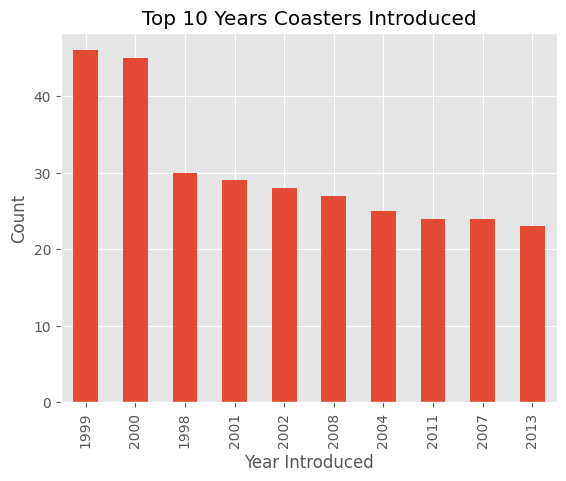

In [39]:
# Compared to other years with 1999 & 2000, there are significant drop that the
# coasters are introduced.Also, after 2000, kind of silimar number of years
# are introduced

print(f"Total unique 'year_introduced' values: {df['year_introduced'].nunique()}")
ax = df["year_introduced"].value_counts().head(10).plot(kind="bar", title="Top 10 Years Coasters Introduced")
ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")
plt.show()

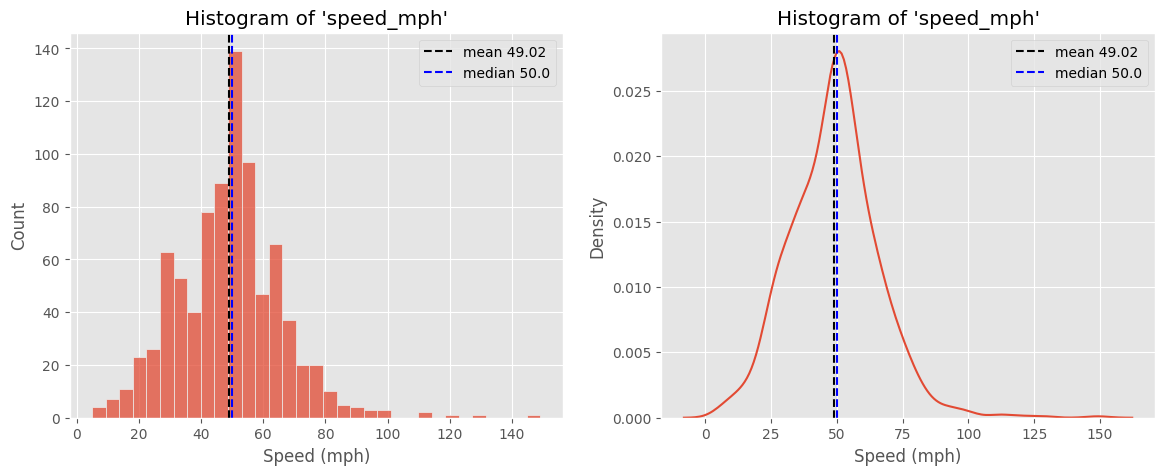

In [60]:
## The distribution has long right tail that indicates that
# very few coasters have very high speed. But the peak is kind off much higher
# because most of the coasters' speed falls into this region.

mean = df["speed_mph"].mean()
median = df["speed_mph"].median()

fig, axs = plt.subplots(1, 2, figsize = (14, 5))

sns.histplot(data=df, x="speed_mph", ax=axs[0])
axs[0].axvline(mean, linestyle="--", color="black", label=f"mean {round(mean, 2)}")
axs[0].axvline(median, linestyle="--", color="blue", label=f"median {round(median, 2)}")
axs[0].set_xlabel("Speed (mph)")
axs[0].set_title("Histogram of 'speed_mph'")
axs[0].legend()

sns.kdeplot(data=df, x="speed_mph", ax=axs[1])
axs[1].axvline(mean, linestyle="--", color="black", label=f"mean {round(mean, 2)}")
axs[1].axvline(median, linestyle="--", color="blue", label=f"median {round(median, 2)}")
axs[1].set_xlabel("Speed (mph)")
axs[1].set_title("Histogram of 'speed_mph'")
axs[1].legend()

plt.show()

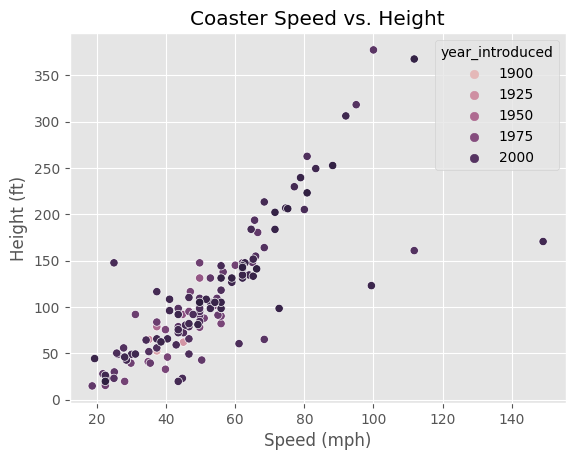

In [74]:
# the graph shows a linear relationship but there is a small
# non-linear relationship also. And there are some outliers.
# Also, the coasters which are introduced around 2000, they have
# the variability throughout the axis but before this year,
# there is no such variability.

sns.scatterplot(x="speed_mph", y="height_ft", data=df, hue="year_introduced")
plt.xlabel("Speed (mph)")
plt.ylabel("Height (ft)")
plt.title("Coaster Speed vs. Height")
plt.show()

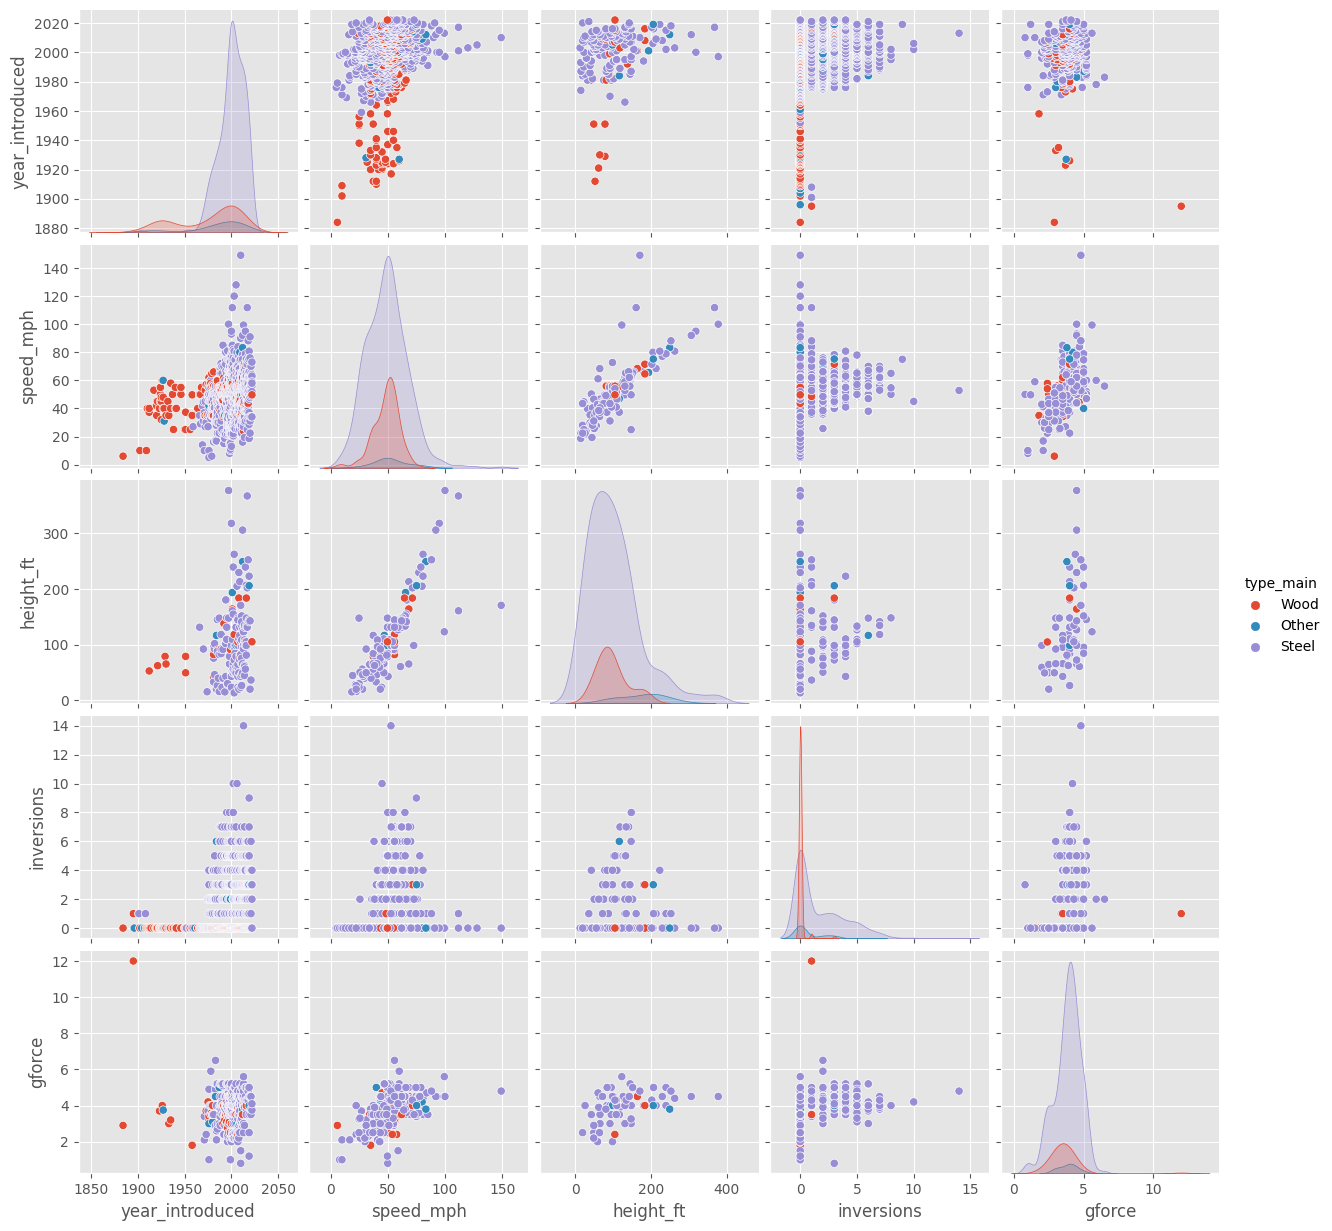

In [82]:
sns.pairplot(
    data=df,
    vars=["year_introduced", "speed_mph", "height_ft", "inversions", "gforce"],
    hue="type_main"
)
plt.show()

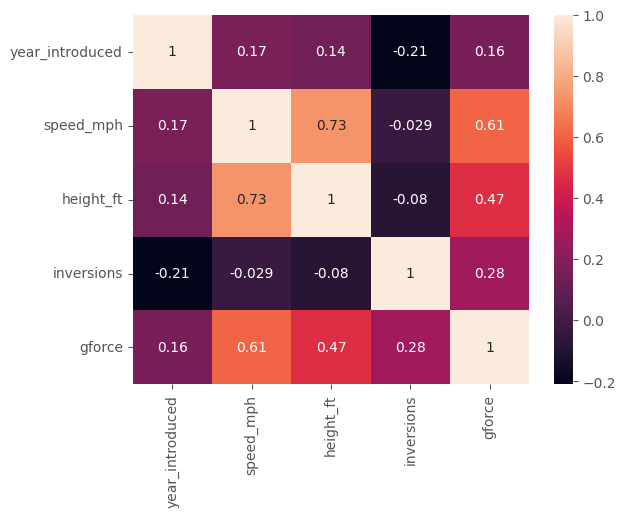

In [85]:
# correlation matrix
df_corr = df[["year_introduced", "speed_mph", "height_ft", "inversions", "gforce"]].dropna().corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [86]:
# what are the locations with the fastest roller coasters (minimum of 10)?
df["location"].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: location, Length: 280, dtype: int64

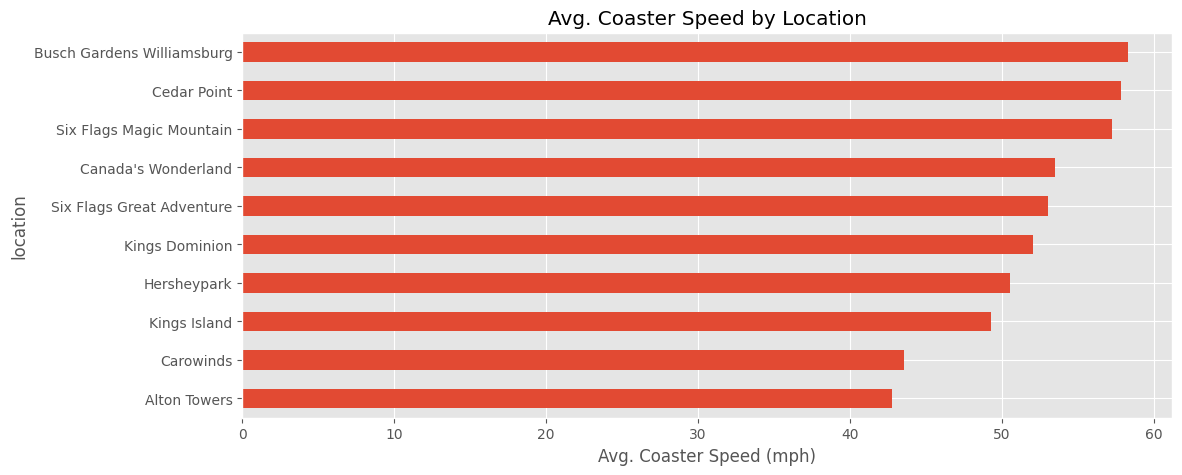

In [97]:
df.query('location != "Other"') \
    .groupby("location")["speed_mph"] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values("mean")["mean"] \
    .plot(kind="barh", figsize=(12, 5), title="Avg. Coaster Speed by Location")
plt.xlabel("Avg. Coaster Speed (mph)")
plt.show()